In [3]:
#imports
import numpy as np
from PIL import Image
from matplotlib.pyplot import imshow


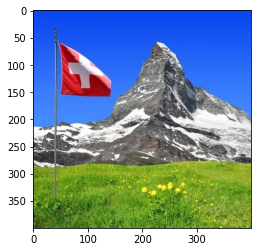

In [4]:
#function shows image
def show_img(img_path):
    #open image
    im = Image.open(img_path, 'r')
    imshow(np.asarray(im))

img_path = 'swiss_view.jpg'
show_img(img_path)

# #function gets image path and resize it to target width and target height
# def resizer(target_w, target_h, image_path):
